# New York City Airbnb Open Data
Can be found on kaggle here: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

The aim of this project is to find some interesting insights from this dataset by performing exploratory data analysis.

In [1]:
# import libraries
import pandas as pd
#import geopandas as gp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")

# Simple Data Exploration
Running some simple functions to peep into the data. 

1. Top 2 rows of the dataset

In [3]:
df.head(2)
#df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


2. Number of Rows and Columns

In [4]:
#pandas function which spits a tuple of the number of rows and columns of the dataframe
df.shape

(48895, 16)

3. Column names with data-type, count of non-null values, count of columns grouped by data-type and memory usage

In [5]:
#pandas function to provide a short summart of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

4. Count, mean, std, min, max and quartile values of columns in the dataset

In [6]:
#pandas function to 'describe' the dataset
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Some of the insights from the above function are:
1. The minimum night requirement is at 7 nights on an average for the Airbnbs in New York. 
2. The average price of an Airbnb in New York per night is ~ about 153$.
3. The property with the most number of reviews has 629 reviews to its name. 

In [7]:
#pandas function to print all column names of the dataset
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# Data Insights

Useful insights derived from the dataset by asking questions.

# 1. What are the top 10 neighbourhoods with the most listings in NY?
The top 10 neighbourhoods are:
'Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick', 'Upper West Side', "Hell's Kitchen", 'East Village', 'Upper East Side','Crown Heights','Midtown'

In [8]:
# creating a dataset with the top 10 neighbourhoods
# value_counts() creates a pandas series with counts of all values
n = df['neighbourhood'].value_counts()
# to_frame() converts pandas series to dataframe and reset_index() converts the indices of the rows into a column
nc = n.to_frame().reset_index()
nc.columns = ['neighbourhood','count'] # renaming the columns
# sorting values using sort function
top_n = nc.sort_values(by='count', ascending=False).head(10)
top_n.neighbourhood.to_list()

['Williamsburg',
 'Bedford-Stuyvesant',
 'Harlem',
 'Bushwick',
 'Upper West Side',
 "Hell's Kitchen",
 'East Village',
 'Upper East Side',
 'Crown Heights',
 'Midtown']

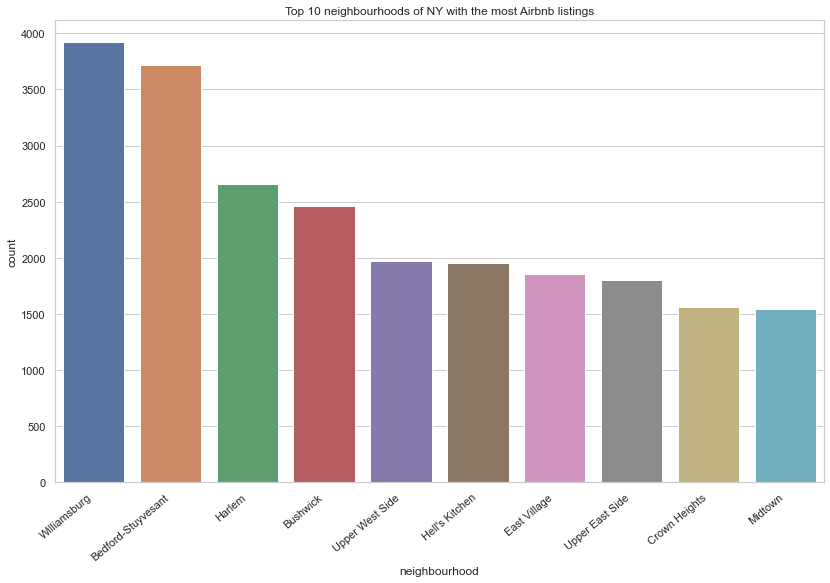

In [9]:
# # matplot lib library to visualize a bar chart
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.bar(top['neighbourhood'],top['count'])
# plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
# plt.show()

# using a seaborn library to visualize a bar chart
ax = sns.barplot(x=top_n['neighbourhood'], y=top_n['count'], errwidth=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Top 10 neighbourhoods of NY with the most Airbnb listings')
plt.tight_layout()
plt.show()

# 2. What is the percentage breakdown of listings by neighbourhood group?
    Manhattan      44%
    Brooklyn       41%
    Queens         12%
    Bronx          2%
    Staten Island  1%

In [10]:
# creating a new dataframe with neighbourhood group counts
ng = df['neighbourhood_group'].value_counts()
ngc = ng.to_frame().reset_index()
ngc.columns = ['group','count']
ngc

,group,count
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


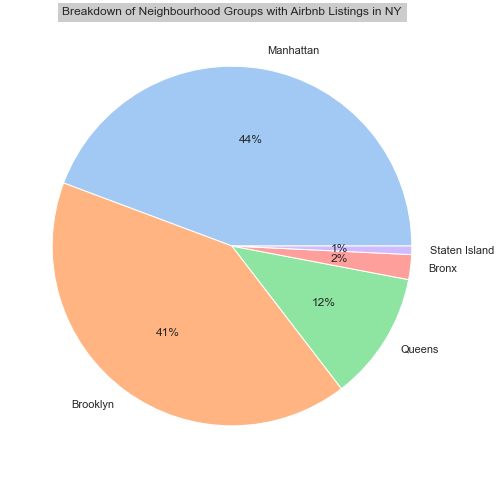

In [11]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(ngc['count'], labels = ngc['group'], colors = colors, autopct='%.0f%%')
plt.title("Breakdown of Neighbourhood Groups with Airbnb Listings in NY", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# 3. What are the available room types in Airbnb listings in NY?
The number of room types available in New York are: Private room, Entire home/apt, Shared room

In [12]:
#Available room types
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)